In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_confusion_matrix

In [2]:
data = pd.read_csv("/home/jorge/tfm-jvm/data/data/data_7.csv")
target_classic = pd.read_csv("/home/jorge/tfm-jvm/data/data/target_classic.csv")
clusters = pd.read_csv("/home/jorge/tfm-jvm/data/data/clusters.csv")
X = data.merge(clusters, on="id_p")
X = X.merge(target_classic, on="id_p")
X

,id_p,n_days,N_last,N_first,N_diff_positive,N_diff_negative,pop_sum_mean,pop_sum_std,pop_mean_mean,pop_mean_std,...,germanos_increase,galos_increase,egipcios_increase,hunos_increase,rs_day_last,p_play,p_play_weekend,p_play_week,cluster,inactive
0,9,7,3,2,1.0,0.0,1013.714286,257.146336,370.380952,45.911621,...,0,1,0,0,16,0.857143,0.5,1.0,1,False
1,10,7,17,16,1.0,0.0,12741.428571,418.476944,762.258403,6.744138,...,0,0,0,0,137,1.000000,1.0,1.0,1,False
2,12,7,3,3,0.0,0.0,1611.857143,111.475601,537.285714,37.158534,...,0,0,0,0,16,1.000000,1.0,1.0,1,True
3,14,7,2,2,0.0,0.0,369.428571,5.563486,184.714286,2.781743,...,0,0,0,0,13,0.428571,0.5,0.4,1,True
4,19,7,1,1,0.0,0.0,214.285714,22.932613,214.285714,22.932613,...,0,0,0,0,30,0.714286,0.5,0.8,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117746,325241,7,1,1,0.0,0.0,372.285714,132.022365,372.285714,132.022365,...,0,0,0,0,16,0.571429,0.5,0.6,2,True
117747,325245,7,2,1,1.0,0.0,474.571429,114.277232,283.285714,36.341961,...,0,1,0,0,30,0.857143,1.0,0.8,2,False
117748,325246,7,1,1,0.0,0.0,205.142857,27.051978,205.142857,27.051978,...,0,0,0,0,35,1.000000,1.0,1.0,2,False
117749,325248,7,2,2,0.0,0.0,322.142857,34.681544,161.071429,17.340772,...,0,0,0,0,32,0.714286,0.0,1.0,2,False


## Split

In [3]:
del X["id_p"], X["n_days"]
y = X["inactive"]
del X["inactive"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Gradient

In [5]:
clf = GradientBoostingClassifier(n_estimators=150, max_depth=11, loss="deviance", learning_rate=0.2)

In [6]:
%%time
clf.fit(X_train, y_train)

CPU times: user 1min 18s, sys: 455 µs, total: 1min 18s
Wall time: 1min 18s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
clf.score(X_test, y_test)

0.9787689381072083

In [8]:
y_pred = clf.predict(X_test)

## Store results

In [12]:
results = X_test.copy()

In [13]:
results["y"] = y_test

In [14]:
results["y_pred"] = y_pred

In [18]:
results["correct"] = (results["y"] == results["y_pred"])

In [20]:
results.to_csv("/home/jorge/tfm-jvm/data/simulations/results.csv", index=False)

## Results

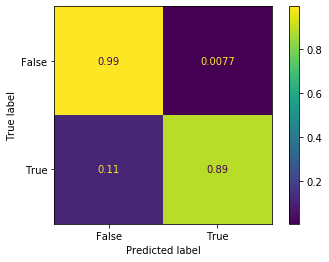

In [9]:
plot_confusion_matrix(clf, X_test, y_test, normalize="true")

In [10]:
pd.DataFrame({"features" : X.columns.to_list(), "importance" : clf.feature_importances_.tolist()}).sort_values(by="importance", ascending=False)

,features,importance
24,rs_day_last,0.558747
26,p_play_weekend,0.072572
25,p_play,0.066399
27,p_play_week,0.062657
12,g_mean_mean,0.060640
13,g_mean_std,0.024378
10,g_sum_mean,0.023443
8,norm2_mean_mean,0.022541
5,pop_sum_std,0.020701
7,pop_mean_std,0.016418


## Simulation

In [11]:
%%time
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s6 = []
s7 = []
s8 = []

for i in range(5,150):
    clf1 = GradientBoostingClassifier(n_estimators=i, max_depth=None, loss="deviance", learning_rate=0.1)
    clf2 = GradientBoostingClassifier(n_estimators=i, max_depth=None, loss="exponential", learning_rate=0.1)
    clf3 = GradientBoostingClassifier(n_estimators=i, max_depth=10, loss="deviance", learning_rate=0.2)
    clf4 = GradientBoostingClassifier(n_estimators=i, max_depth=10, loss="exponential", learning_rate=0.2)
    clf5 = GradientBoostingClassifier(n_estimators=i, max_depth=7, loss="deviance", learning_rate=0.05)
    clf6 = GradientBoostingClassifier(n_estimators=i, max_depth=7, loss="exponential", learning_rate=0.05)
    clf7 = GradientBoostingClassifier(n_estimators=i, max_depth=3, loss="deviance", learning_rate=0.4)
    clf8 = GradientBoostingClassifier(n_estimators=i, max_depth=3, loss="exponential", learning_rate=0.4)
    

    s1.append(clf1.fit(X_train, y_train).score(X_test, y_test))
    s2.append(clf2.fit(X_train, y_train).score(X_test, y_test))
    s3.append(clf3.fit(X_train, y_train).score(X_test, y_test))
    s4.append(clf4.fit(X_train, y_train).score(X_test, y_test))
    s5.append(clf5.fit(X_train, y_train).score(X_test, y_test))
    s6.append(clf6.fit(X_train, y_train).score(X_test, y_test))
    s7.append(clf7.fit(X_train, y_train).score(X_test, y_test))
    s8.append(clf8.fit(X_train, y_train).score(X_test, y_test))
    print(i)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
CPU times: user 10h 5min 11s, sys: 1min 33s, total: 10h 6min 44s
Wall time: 10h 10min 54s


In [12]:
gb_sim = pd.DataFrame({"s1":s1, "s2":s2, "s3":s3, "s4":s4, "s5":s5, "s6":s6, "s7":s7, "s8":s8})
gb_sim

,s1,s2,s3,s4,s5,s6,s7,s8
0,0.968578,0.866686,0.972620,0.967066,0.866686,0.866686,0.910337,0.896647
1,0.968544,0.866686,0.972705,0.970022,0.866686,0.866686,0.918371,0.897225
2,0.968782,0.866686,0.973673,0.970582,0.866686,0.866686,0.929768,0.903917
3,0.968612,0.866686,0.973860,0.972009,0.866737,0.866686,0.929870,0.904630
4,0.968510,0.866686,0.973979,0.972485,0.866788,0.866686,0.944731,0.915127
...,...,...,...,...,...,...,...,...
140,0.968969,0.968731,0.978174,0.978735,0.977172,0.975746,0.976969,0.974794
141,0.968850,0.968833,0.977954,0.978378,0.977104,0.975746,0.976884,0.974811
142,0.968952,0.968561,0.977886,0.978548,0.977257,0.975814,0.977121,0.974828
143,0.968986,0.968867,0.977631,0.978497,0.977257,0.975661,0.977121,0.974828


In [14]:
gb_sim.to_csv("/home/jorge/tfm-jvm/data/gb_simulations.csv", index=False)

In [21]:
#Matplotlibs defines
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


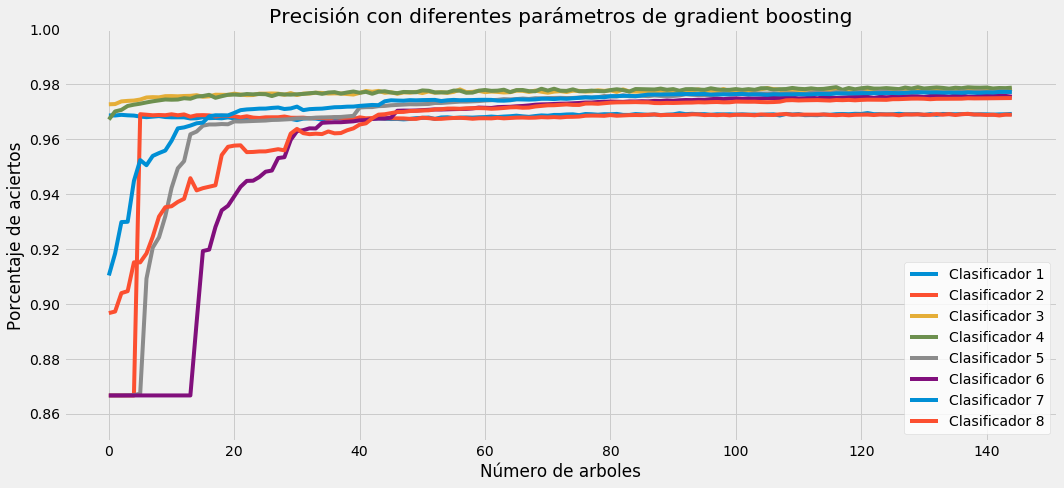

In [23]:
x = np.arange(len(range(5,150)))
width = 0.3 

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x, s1, label='Clasificador 1')
ax.plot(x, s2, label='Clasificador 2')
ax.plot(x, s3, label='Clasificador 3')
ax.plot(x, s4, label='Clasificador 4')
ax.plot(x, s5, label='Clasificador 5')
ax.plot(x, s6, label='Clasificador 6')
ax.plot(x, s7, label='Clasificador 7')
ax.plot(x, s8, label='Clasificador 8')


ax.set_title('Precisión con diferentes parámetros de gradient boosting')
ax.set_ylim(bottom=0.85, top=1)
ax.set_ylabel("Porcentaje de aciertos")
ax.set_xlabel("Número de arboles")
legend = ax.legend(frameon=True)
legend.get_frame().set_facecolor((1, 1, 1))
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/gradient_boosting_sim.eps")